# Dados discrepantes
Como identificar e tratar outliers.

In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# Título do arquivo a ser descarregado
file_path = "weather_classification_data.csv"

In [ ]:
# Coleta de dados e armazenamento em dataframe Pandas
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"nikhil7280/weather-type-classification",file_path)

/tmp/ipython-input-23-111816136.py:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS,"nikhil7280/weather-type-classification",file_path)


100%|██████████| 806k/806k [00:00<00:00, 2.60MB/s]


In [ ]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [ ]:
df.shape

(13200, 11)

## Identificação visual

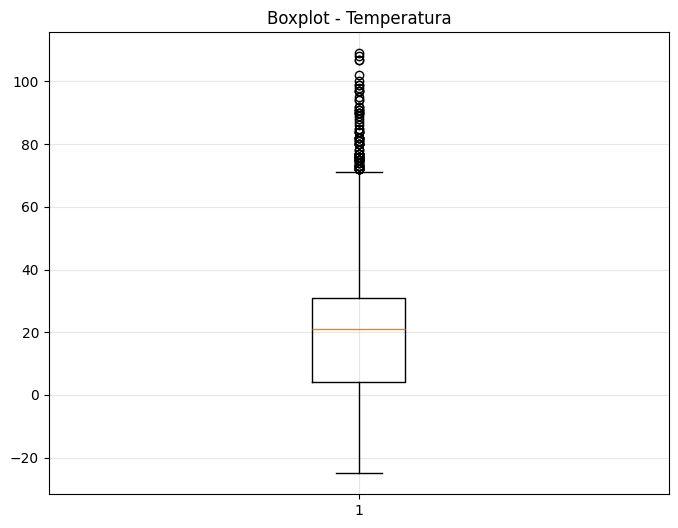

In [ ]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Temperature'].dropna())
plt.title('Boxplot - Temperatura')
plt.grid(True, alpha=0.3)
plt.show()

## Identificação em números absolutos

In [ ]:
df['Temperature'].describe()

count    13200.000000
mean        19.127576
std         17.386327
min        -25.000000
25%          4.000000
50%         21.000000
75%         31.000000
max        109.000000
Name: Temperature, dtype: float64

In [ ]:
# Intervalo entre quartil
q1 = df['Temperature'].quantile(0.25)
q2 = df['Temperature'].quantile(0.75)

intervalo_q = q2-q1

In [ ]:
limite_inferior = q1 - (intervalo_q * 1.5)
limite_inferior

np.float64(-36.5)

In [ ]:
limite_superior = q2 + (intervalo_q * 1.5)
limite_superior

np.float64(71.5)

## Exclusão de outliers

In [ ]:
df_sem_outlier = df[(df['Temperature'] < limite_inferior) | (df['Temperature'] < limite_superior)]

In [ ]:
df_sem_outlier.shape

(13108, 11)

## Método Winsorização (Capping)

In [ ]:
def winsorize_coluna(df, coluna, limite_inferior_substituicao=5, limite_superior_substituicao=95):
    # Calcula valor correspondente aos percentis
    limite_inferior_substituicao = np.percentile(df[coluna].dropna(), limite_inferior_substituicao)
    limite_superior_substituicao = np.percentile(df[coluna].dropna(), limite_superior_substituicao)

    # Aplica winsorização (capping)
    df[coluna] = df[coluna].clip(lower=limite_inferior_substituicao, upper=limite_superior_substituicao)

    return df

In [ ]:
df_winsorized = winsorize_coluna(df.copy(), 'Temperature', 5, 75)

In [ ]:
df_winsorized['Temperature'].describe()

count    13200.000000
mean        16.823864
std         13.416288
min         -9.000000
25%          4.000000
50%         21.000000
75%         30.000000
max         30.000000
Name: Temperature, dtype: float64